In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0205/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 430 ms, sys: 32 ms, total: 463 ms
Wall time: 465 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,0.024621,0.0,-0.024365,0.0,0.001922,0.0,-0.003011,0.0,-0.005961,...,0.0,-0.001503,0.0,-0.000825,0.0,-0.022286,0.0,-0.015519,0.0,-0.002697
1,0.0,0.025858,0.0,0.004027,0.0,-0.007039,0.0,-0.005754,0.0,-0.006045,...,0.0,-0.008715,0.0,-0.006315,0.0,-0.005572,0.0,-0.011378,0.0,0.003534
2,0.0,0.030682,0.0,0.005193,0.0,-0.013087,0.0,-0.012223,0.0,-0.003968,...,0.0,-0.012857,0.0,-0.007954,0.0,-0.011126,0.0,-0.010155,0.0,-0.001108
3,0.0,0.038674,0.0,0.002356,0.0,-0.011596,0.0,-0.001277,0.0,-0.002812,...,0.0,-0.001247,0.0,0.000168,0.0,-0.006163,0.0,0.006136,0.0,0.003899
4,0.0,0.025862,0.0,0.002648,0.0,-0.006528,0.0,0.001232,0.0,0.002380,...,0.0,-0.006834,0.0,0.001947,0.0,-0.001582,0.0,0.010610,0.0,0.001838


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.0,0.00002,0.002492,3.902047e-07,0.0,0.0,...,0.0,0.0,0.000000,0.000531,1.423466e-04,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0,...,0.0,0.0,0.013045,0.096636,5.585190e-08,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.0,0.00002,0.002495,3.902048e-07,0.0,0.0,...,0.0,0.0,0.000000,0.000531,1.423568e-04,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0,...,0.0,0.0,0.013131,0.101460,5.585190e-08,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    44.000000
1    42.000001
2    45.000000
3    43.000000
4    39.000000
5    40.999915
6    31.999656
dtype: float64

In [26]:
%%time
catch_all_averaged_preds = []
for i in range(910):
    file_name = "all_forecasts_sub_" + str(i) + '.npy'
    al_forecasts_npy_file = np.load(os.path.join(path_to_dfs, file_name))
    # make the conversion
    sub_window_forecasts = np.exp(al_forecasts_npy_file) - 1
    # get rid of anything below zero?
    # sub_window_forecasts[sub_window_forecasts < 0] = 0
    # get averages over time 
    sub_window_forecasts_averaged = np.mean(sub_window_forecasts, axis = (0,1))
    catch_all_averaged_preds.append(sub_window_forecasts_averaged)    

CPU times: user 162 ms, sys: 40.4 ms, total: 202 ms
Wall time: 201 ms


In [27]:
len(catch_all_averaged_preds)

910

In [28]:
catch_all_averaged_preds[0]

array([0.04317458, 0.04485506, 0.0507483 , 0.06109921, 0.04534346,
       0.07451852, 0.05933199], dtype=float32)

In [29]:
# make this a dataframe

In [30]:
Forecasted_values_df = pd.DataFrame(catch_all_averaged_preds).T

In [31]:
Forecasted_values_df.shape

(7, 910)

In [32]:
sum_forecasted_values = Forecasted_values_df.sum(axis = 1)

In [33]:
sum_forecasted_values

0    29.588516
1    28.278748
2    30.824533
3    41.858631
4    31.639008
5    35.772366
6    50.197723
dtype: float32

In [34]:
# These results are absurd, let's stick to what we had done before, we can justify that, this is what we did for comps as well

In [35]:
# concatenate the sum dataframes
block_0205_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0205_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0205_true_and_forecasted_values_df

,True_count,Forecasted_count
0,44.000000,29.588516
1,42.000001,28.278748
2,45.000000,30.824533
3,43.000000,41.858631
4,39.000000,31.639008
5,40.999915,35.772366
6,31.999656,50.197723


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

12.017198464158605

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

10.605169076837345

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=-0.7441826345743565, pvalue=0.05508205034712691)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-7.80082764234149

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.mean(np.exp(load_file)-1, axis = 1)
    loaded_npy_files.append(mean_file)

CPU times: user 217 ms, sys: 81.3 ms, total: 298 ms
Wall time: 299 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[ 0.13277747,  0.05911891, -0.02547668, ..., -0.13166264,
         0.10077524,  0.12647508],
       [ 0.01999149, -0.14455222, -0.0210124 , ...,  0.04364157,
         0.08888306,  0.05833311],
       [ 0.03069815,  0.11457182,  0.15567422, ...,  0.03691205,
         0.25093305,  0.14598465],
       ...,
       [-0.11107068,  0.06748974,  0.06486017, ...,  0.04873408,
         0.18285389,  0.1195277 ],
       [-0.06566632,  0.13590002,  0.22294068, ...,  0.13424866,
         0.04235895,  0.04353487],
       [ 0.02153082, -0.0033108 ,  0.08170374, ..., -0.04031914,
         0.06037517,  0.09668204]], dtype=float32)

In [51]:
# %%time
# # convert less than 0 entries to 0 for all arrays
# for arr in loaded_npy_files:
#     arr[arr < 0] = 0

In [52]:
loaded_npy_files[0]

array([[ 0.13277747,  0.05911891, -0.02547668, ..., -0.13166264,
         0.10077524,  0.12647508],
       [ 0.01999149, -0.14455222, -0.0210124 , ...,  0.04364157,
         0.08888306,  0.05833311],
       [ 0.03069815,  0.11457182,  0.15567422, ...,  0.03691205,
         0.25093305,  0.14598465],
       ...,
       [-0.11107068,  0.06748974,  0.06486017, ...,  0.04873408,
         0.18285389,  0.1195277 ],
       [-0.06566632,  0.13590002,  0.22294068, ...,  0.13424866,
         0.04235895,  0.04353487],
       [ 0.02153082, -0.0033108 ,  0.08170374, ..., -0.04031914,
         0.06037517,  0.09668204]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[ 41.68239 ,  34.084896,  37.985813, ...,  33.802063,  36.7635  ,
         38.097958],
       [ 27.566925,  29.3582  ,  33.688797, ...,  24.626368,  32.55868 ,
         35.640648],
       [ 64.090256,  29.483335,  36.991333, ...,  79.54111 ,  76.781624,
        219.87868 ],
       ...,
       [ 33.898792,  33.496155,  36.84037 , ...,  44.23781 ,  44.011913,
         72.371864],
       [ 34.852123,  28.898638,  41.021065, ...,  50.971645,  48.201633,
         69.22852 ],
       [ 34.10019 ,  32.894447,  40.97079 , ...,  50.747078,  50.586098,
         83.27709 ]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[ 41.68239 ,  34.084896,  37.985813, ...,  33.802063,  36.7635  ,
         38.097958],
       [ 27.566925,  29.3582  ,  33.688797, ...,  24.626368,  32.55868 ,
         35.640648],
       [ 64.090256,  29.483335,  36.991333, ...,  79.54111 ,  76.781624,
        219.87868 ],
       ...,
       [ 33.898792,  33.496155,  36.84037 , ...,  44.23781 ,  44.011913,
         72.371864],
       [ 34.852123,  28.898638,  41.021065, ...,  50.971645,  48.201633,
         69.22852 ],
       [ 34.10019 ,  32.894447,  40.97079 , ...,  50.747078,  50.586098,
         83.27709 ]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[16.59469166],
       [17.57071466],
       [17.90189795],
       [17.61749821],
       [13.78905475],
       [20.42857938],
       [23.39563098]])

In [63]:
ui_train

array([[ 46.88229017],
       [ 40.74606295],
       [ 43.80793037],
       [ 81.36419201],
       [ 59.01587677],
       [ 55.41426201],
       [100.87620335]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

42.97267857619691

In [66]:
y_traina = block_0205_true_and_forecasted_values_df[["True_count"]].values

In [67]:
y_traina

array([[44.00000033],
       [42.00000143],
       [45.00000031],
       [42.99999999],
       [39.00000007],
       [40.99991549],
       [31.99965594]])

In [68]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [69]:
coverage_train

0.7142857142857143

In [70]:
np.mean(output, axis = 0)

array([29.58851 , 28.278738, 30.82456 , 41.85866 , 31.638987, 35.772346,
       50.19775 ], dtype=float32)

In [71]:
sum_forecasted_values

0    29.588516
1    28.278748
2    30.824533
3    41.858631
4    31.639008
5    35.772366
6    50.197723
dtype: float32

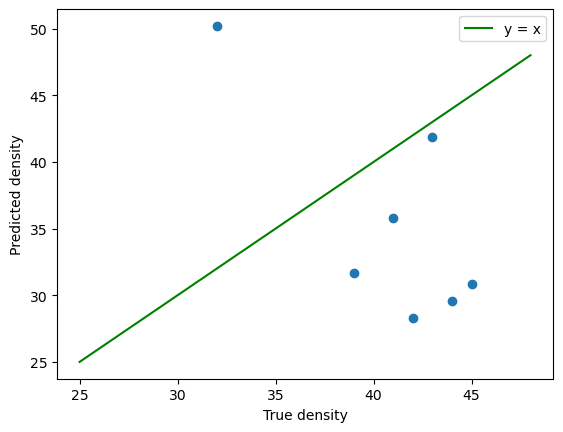

In [76]:
plt.scatter(block_0205_true_and_forecasted_values_df['True_count'], block_0205_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([25, 48], [25, 48], color='green', label='y = x')
plt.legend()
plt.show()

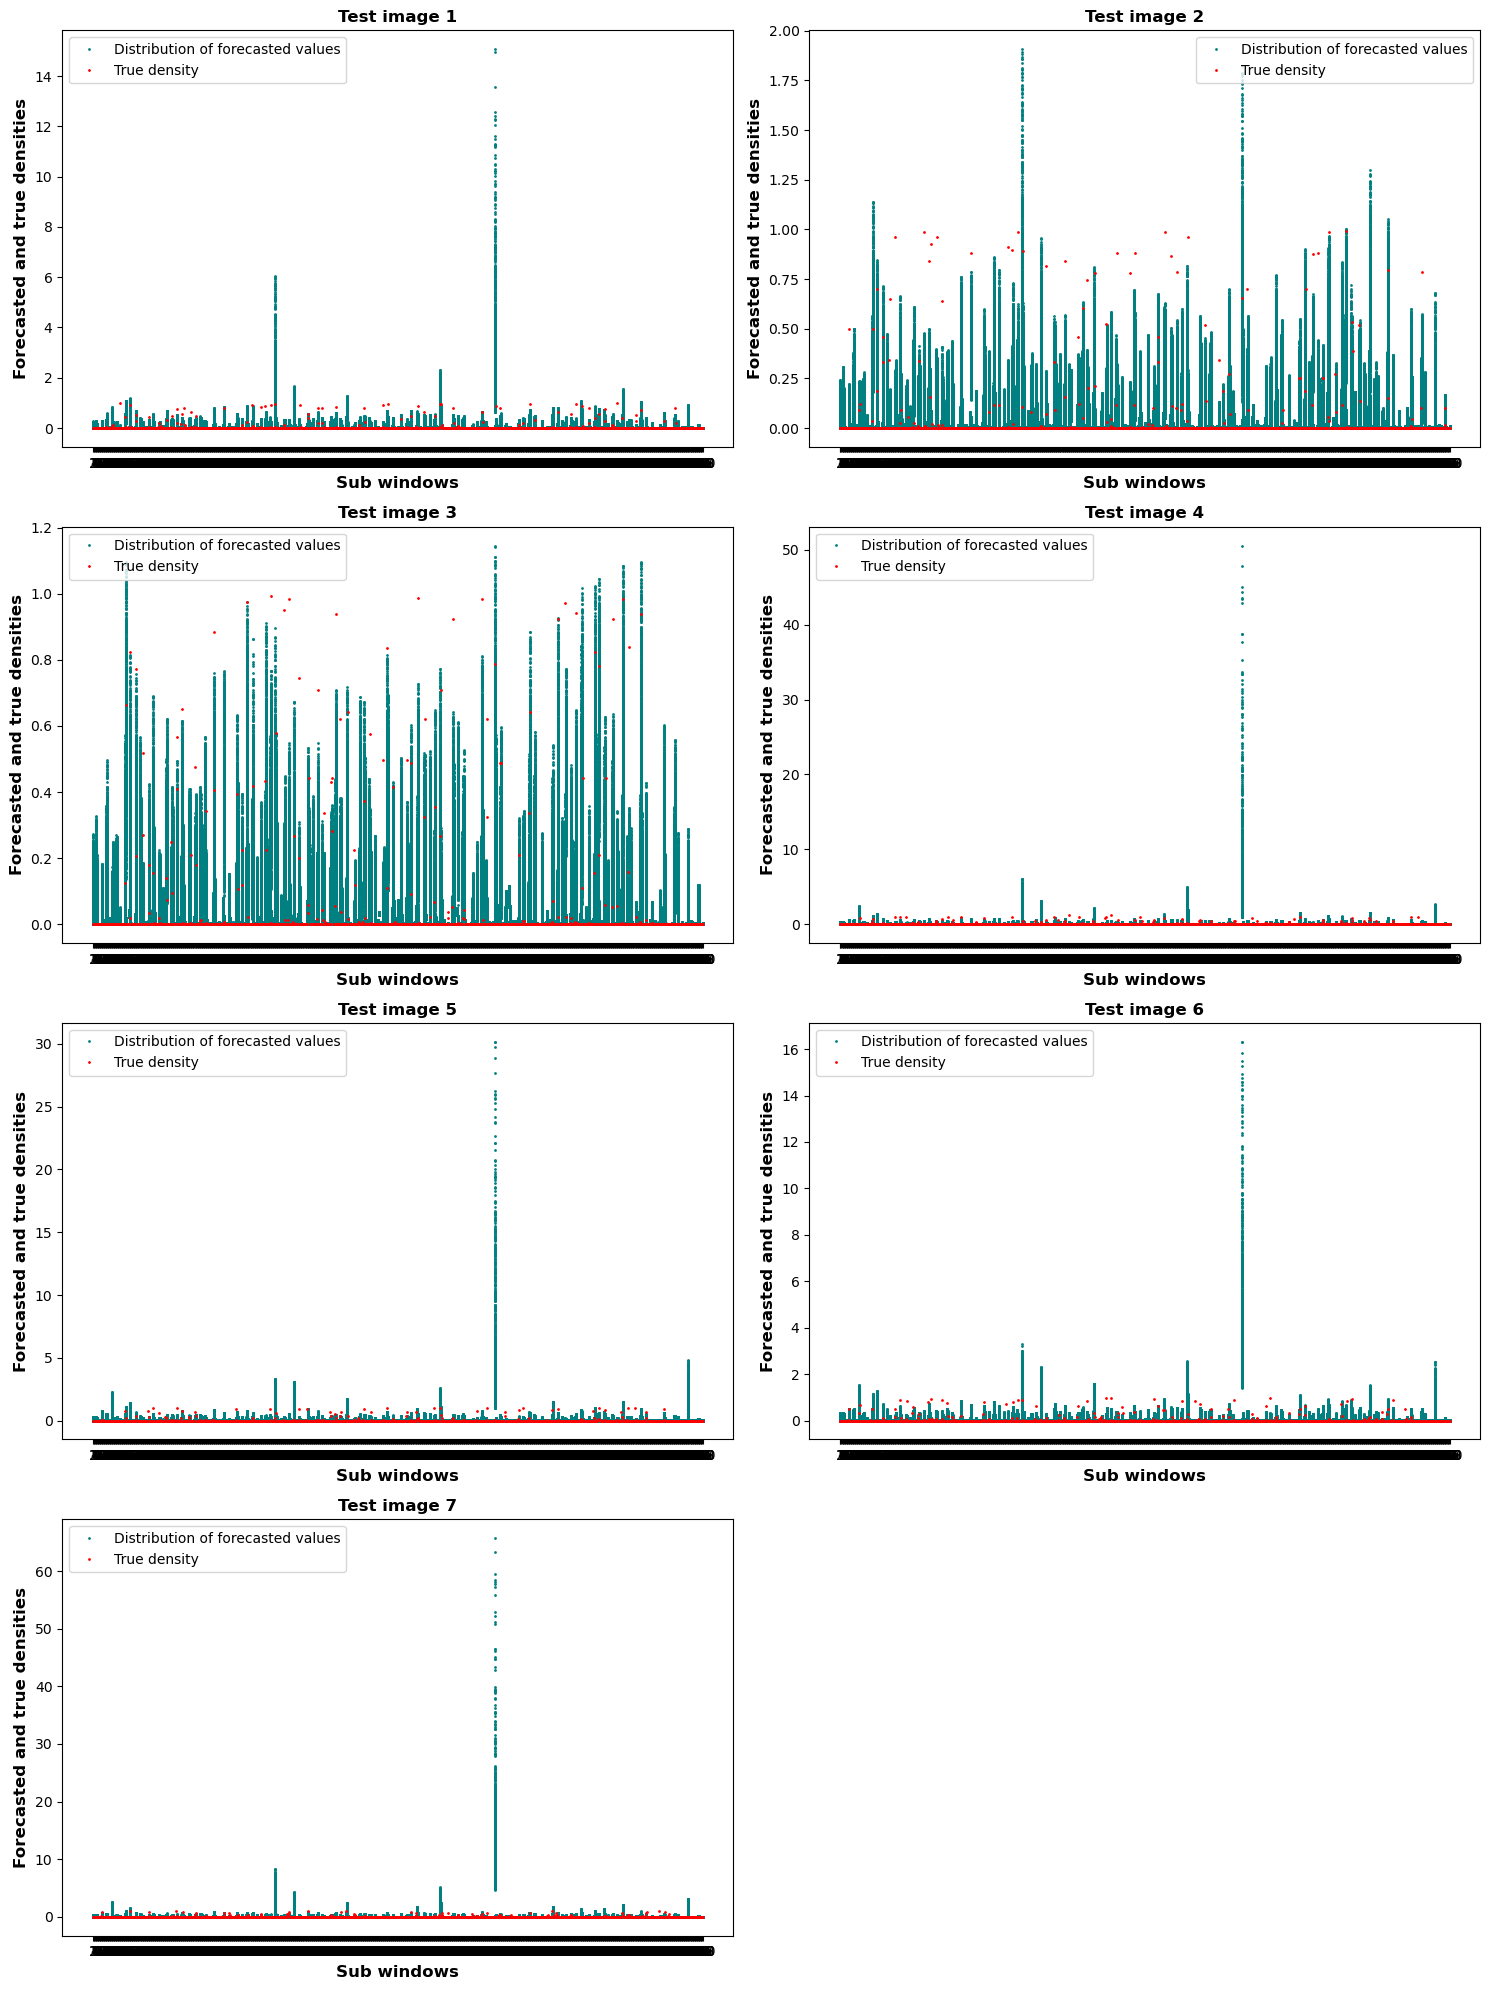

CPU times: user 33.5 s, sys: 818 ms, total: 34.3 s
Wall time: 33.9 s


In [73]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [74]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [75]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 